# Comparação entre Cross-Entropy e MSE em Classificação

Esse notebook apresenta uma resposta para a seguinte pergunta:

> ❓**Por que não usar MSE em vez de entropia cruzada para classificação?**

Embora seja *possível* usar o **Erro Quadrático Médio (MSE)** em problemas de classificação, **a entropia cruzada (cross-entropy)** é preferida por motivos teóricos e práticos, discutidos a seguir.

### 1. **MSE trata saídas como contínuas, não como probabilidades categóricas**
- O MSE mede a distância entre dois vetores numéricos.
- Mas na classificação, o objetivo é maximizar a **probabilidade da classe correta**, não minimizar distâncias vetoriais.

Exemplo:
```text
Saída do modelo: [0.7, 0.2, 0.1]
Verdadeiro rótulo (one-hot): [1, 0, 0]

MSE = ((0.7 - 1)^2 + (0.2 - 0)^2 + (0.1 - 0)^2)/3 ≈ 0.046
```
Esse valor não nos diz o quão “confiante” o modelo está na classe correta — o MSE trata os outros valores como igualmente importantes, mesmo que não sejam.

### 2. **A entropia cruzada foca na probabilidade da classe correta**
Ela penaliza fortemente quando a probabilidade da classe verdadeira é baixa.

Usando o mesmo exemplo:
```text
Cross-entropy = -log(0.7) ≈ 0.357
```
Se o modelo estivesse menos confiante, tipo `[0.4, 0.3, 0.3]`, a penalização aumentaria:
```text
Cross-entropy = -log(0.4) ≈ 0.916
```

Isso encoraja o modelo a **atribuir mais probabilidade à classe correta**, que é exatamente o que queremos em classificação.

### 3. **Cross-entropy tem melhor comportamento de gradiente**
- MSE gera **gradientes muito pequenos** quando usamos funções como softmax + one-hot.
- Isso pode levar a **treinamento lento ou travado** em regiões do espaço de parâmetros.
- A cross-entropy, combinada com softmax, produz **gradientes bem direcionados**, especialmente nos primeiros passos do treinamento.

### 4. **Interpretação estatística**
- A entropia cruzada tem base em teoria da informação e modelagem probabilística.
- Ela mede a "distância" entre a distribuição prevista e a real (one-hot), e equivale ao **log loss** — estimar a máxima verossimilhança.

### Conclusão

> Embora o MSE possa ser usado em classificação, ele **não é ideal**, pois:
> - Não modela corretamente a natureza probabilística do problema;
> - Gera gradientes menos informativos;
> - Leva a convergência mais lenta e, frequentemente, menor acurácia final.

A entropia cruzada, por outro lado, **alinha diretamente com o objetivo da tarefa de classificação** — prever corretamente a classe com alta confiança.

As visualizações produzidas abaixo mostram visualmente porque a cross-entropy é preferida à MSE no contexto de um problema de classificação. Podemos perceber pelos gráficos que a primeira é mais sensível ao erro probabilístico e fornece gradientes mais eficazes para serem usados na otimização (i.e., na atualização dos parâmetros do modelo durante o treinamento).

### **Gráfico da função de custo (esquerda)**
- A **cross-entropy** penaliza fortemente previsões com baixa confiança na classe correta (à esquerda).
- O **MSE** cresce de forma mais suave e não reflete a severidade do erro probabilístico.

### **Gráfico dos gradientes (direita)**
- A **derivada da cross-entropy** explode conforme a previsão se aproxima de 0, incentivando correções rápidas.
- A **derivada do MSE** fica pequena próximo da classe correta (`y_pred ≈ 1`), o que pode tornar o treinamento lento ou ineficaz no início.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Classe verdadeira = 1

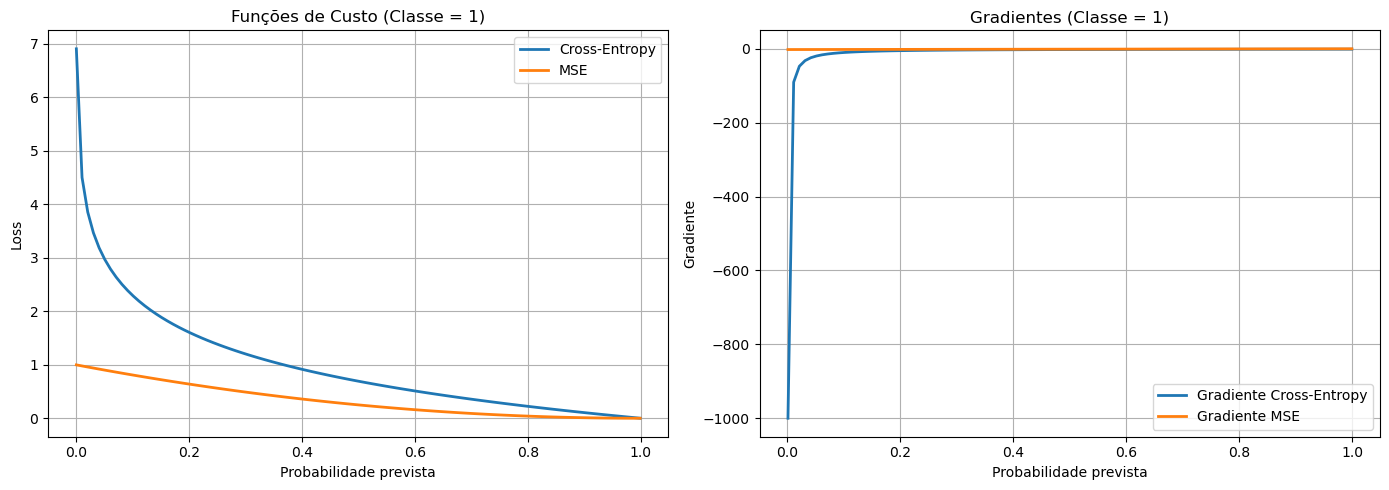

In [2]:

y_pred = np.linspace(0.001, 0.999, 100)
y_true = 1

ce_loss = -np.log(y_pred)
ce_grad = -1 / y_pred

mse_loss = (y_pred - y_true) ** 2
mse_grad = 2 * (y_pred - y_true)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(y_pred, ce_loss, label="Cross-Entropy", linewidth=2)
axs[0].plot(y_pred, mse_loss, label="MSE", linewidth=2)
axs[0].set_title("Funções de Custo (Classe = 1)")
axs[0].set_xlabel("Probabilidade prevista")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(y_pred, ce_grad, label="Gradiente Cross-Entropy", linewidth=2)
axs[1].plot(y_pred, mse_grad, label="Gradiente MSE", linewidth=2)
axs[1].set_title("Gradientes (Classe = 1)")
axs[1].set_xlabel("Probabilidade prevista")
axs[1].set_ylabel("Gradiente")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Classe verdadeira = 0

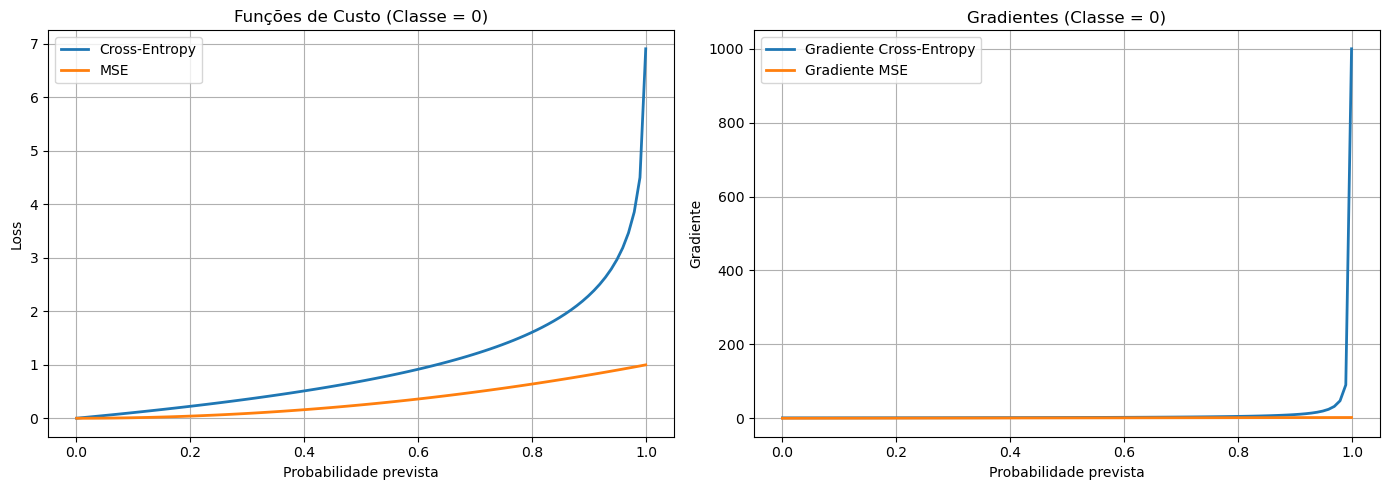

In [3]:

y_true = 0

ce_loss_0 = -np.log(1 - y_pred)
ce_grad_0 = 1 / (1 - y_pred)

mse_loss_0 = (y_pred - y_true) ** 2
mse_grad_0 = 2 * (y_pred - y_true)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
axs[0].plot(y_pred, ce_loss_0, label="Cross-Entropy", linewidth=2)
axs[0].plot(y_pred, mse_loss_0, label="MSE", linewidth=2)
axs[0].set_title("Funções de Custo (Classe = 0)")
axs[0].set_xlabel("Probabilidade prevista")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(y_pred, ce_grad_0, label="Gradiente Cross-Entropy", linewidth=2)
axs[1].plot(y_pred, mse_grad_0, label="Gradiente MSE", linewidth=2)
axs[1].set_title("Gradientes (Classe = 0)")
axs[1].set_xlabel("Probabilidade prevista")
axs[1].set_ylabel("Gradiente")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Conclusão

- A **Cross-Entropy** penaliza fortemente previsões incorretas com alta confiança.
- Seus **gradientes são mais informativos** e eficientes para otimização.
- O **MSE** é mais suave, mas **menos adequado para tarefas de classificação**.